# Logistic Regression
### Definisi Logistic Regression
Logistic Regression adalah model regresi yang menggunakan fungsi logistic. Model ini digunakan untuk memprediksi probabilitas dari kelas tertentu. Setiap probabilitas akan bernilai antara 0 dan 1 dengan total probabilitas yang bernilai 1.

In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Memuat Dataset
Pada percobaan kali ini menggunakan dataset kanker payudara yang bersumber dari UCI Machine Learning Repository dan dapat diimpor melalui library sklearn.

In [15]:
bc = datasets.load_breast_cancer()
# print(bc)
print(bc.data)
print(bc.target)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [16]:
X, y    = bc.data, bc.target
print(X, y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [17]:
n_samples, n_features = X.shape
print(f"Banyaknya sampel data: {n_samples} dan banyaknya fitur: {n_features}")

Banyaknya sampel data: 569 dan banyaknya fitur: 30


# Cetak Tabel dengan Pandas
Mencetak tabel yang bersisi data dan target. Data yang ditampilkan adalah 30 fitur (kolom) dan 1 sampel (baris)

In [18]:
import pandas as pd
df = pd.DataFrame(X, columns=bc.feature_names)
df['target'] = y
# df.head(10)
df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


# Training dan Testing Split
Percobaan ini akan menggunakan 80% data dari dataset untuk keperluan training dan 20% data untuk keperluan testing. Untuk memisahkan data, digunakan fungsi train_test_split yang dapat diimpor dari library sklearn.model_selection.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Banyaknya sampel untuk training: {X_train.shape[0]} dan banyaknya sampel untuk testing: {X_test.shape[0]}")

Banyaknya sampel untuk training: 455 dan banyaknya sampel untuk testing: 114


## Plot data training dan testing menggunakan fitur pertama dan kedua

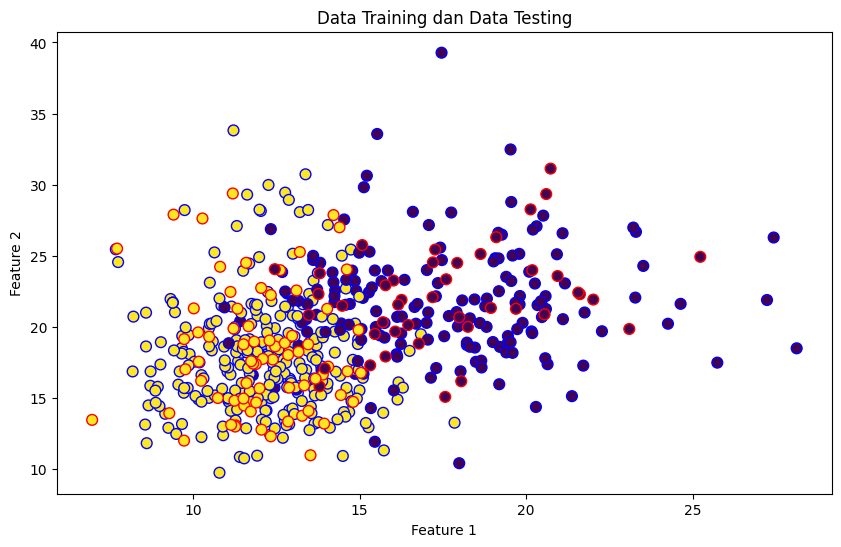

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=60, edgecolor='b')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=60, edgecolor='r')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Training dan Data Testing")
plt.show()

## Transformasi Data

In [21]:
# Membuat scaler untuk data training
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [22]:
# Transformasi data training dan testing
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
print("X_train\n", X_train)
print("X_test\n", X_test)

X_train
 [[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]
X_test
 [[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


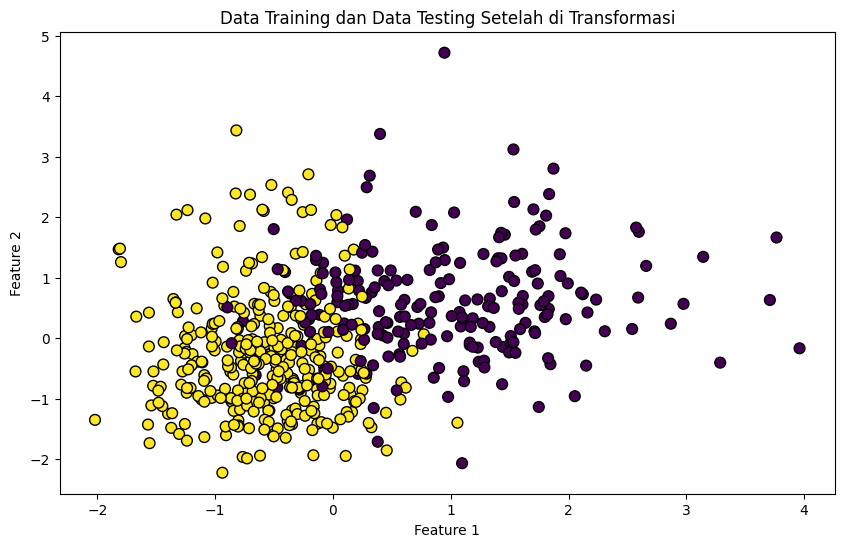

In [23]:
# Plot data training dan testing
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=60, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=60, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Training dan Data Testing Setelah di Transformasi")
plt.show()

Dapat kita amati bahwa hasil plot data training dan testing setelah dilakukan scaler akan berubah. Proses ini disebut standarisasi data (data standardization), yaitu proses normalisasi data sehingga data memiliki mean=0 dan variance=1.

- fit_transform digunakan untuk training data. Metode fit mengkalkulasi mean dan variance dari setiap fitur data. Transformasi ini mentransformasikan setiap fitur menggunakan mean dan variance yang telah dikalkulasi.
- transform digunakan untuk data testing. Perbedaannya, transform menggunakan nilai mean dan variance yang telah dikalkulasi dari training data untuk ditransformasikan terhadap data testing.

Mengapa kita perlu melakukan ini? Jika kita menggunakan metode fit_transform pada data testing, kita akan menghitung ulang mean dan varians. Ini adalah prosedur standar untuk menskalakan data pada saat membangun model pembelajaran mesin.

# Persiapan Data Sebelum Training

In [ ]:
# Konversi data training dan testing ke tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# melakukan reshape terhadap y_test dan y_train
y_train = y_train.view(-1, 1)
y_test  = y_test.view(-1, 1)
# print(y_train)
# print(y_test)

# Create Model
Model yang digunakan adalah logistic regression dengan menggunakan library torch.nn. Sementara untuk fungsi aktivasi, kita menggunakan fungsi Sigmoid. Fungsi sigmoid akan menghasilkan nilai keluaran 0 atau 1 berdasarkan dari nilai yang dihasilkan oleh fungsi.

In [26]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size=1):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)
print(model)

LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)


# Fungsi Loss dan Optimizer
Fungsi loss yang digunakan adalah Binary Cross Enthropy. Sementara itu, optimizer yang digunakan adalah Stochastic Gradient Descent.

In [27]:
learning_rate = 0.01
loss_function = nn.BCELoss()
optimizer     = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training

In [30]:
# Training loop
num_epoch = 10000
for epoch in range(num_epoch):
    # forward pass
    y_predicted = model(X_train)

    # backward pass
    loss = loss_function(y_predicted, y_train)
    loss.backward()

    # perbaharui weight
    optimizer.step()

    # Reset optimizer jadi 0
    optimizer.zero_grad()

    # Menampilkan loss setiap epoch
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

Epoch: 10, Loss: 0.1031
Epoch: 20, Loss: 0.1028
Epoch: 30, Loss: 0.1025
Epoch: 40, Loss: 0.1022
Epoch: 50, Loss: 0.1020
Epoch: 60, Loss: 0.1017
Epoch: 70, Loss: 0.1014
Epoch: 80, Loss: 0.1012
Epoch: 90, Loss: 0.1009
Epoch: 100, Loss: 0.1007
Epoch: 110, Loss: 0.1004
Epoch: 120, Loss: 0.1002
Epoch: 130, Loss: 0.1000
Epoch: 140, Loss: 0.0997
Epoch: 150, Loss: 0.0995
Epoch: 160, Loss: 0.0993
Epoch: 170, Loss: 0.0990
Epoch: 180, Loss: 0.0988
Epoch: 190, Loss: 0.0986
Epoch: 200, Loss: 0.0984
Epoch: 210, Loss: 0.0982
Epoch: 220, Loss: 0.0979
Epoch: 230, Loss: 0.0977
Epoch: 240, Loss: 0.0975
Epoch: 250, Loss: 0.0973
Epoch: 260, Loss: 0.0971
Epoch: 270, Loss: 0.0969
Epoch: 280, Loss: 0.0967
Epoch: 290, Loss: 0.0965
Epoch: 300, Loss: 0.0963
Epoch: 310, Loss: 0.0961
Epoch: 320, Loss: 0.0959
Epoch: 330, Loss: 0.0957
Epoch: 340, Loss: 0.0955
Epoch: 350, Loss: 0.0954
Epoch: 360, Loss: 0.0952
Epoch: 370, Loss: 0.0950
Epoch: 380, Loss: 0.0948
Epoch: 390, Loss: 0.0946
Epoch: 400, Loss: 0.0945
Epoch: 41

# Evaluasi Performa

In [32]:
with torch.no_grad():
    y_predicted     = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc             = y_predicted_cls.eq(y_test).sum().float() / y_test.shape[0]
    print(f"Akurasi: {acc.item():.4f}")

Akurasi: 0.9912


In [35]:
# Perbandingan antara y_test dan y_predicted_cls menggunakan pandas
df_test = pd.DataFrame(y_test.numpy(), columns=['y_test'])
df_test['y_predicted_cls'] = y_predicted_cls.numpy()
df_test['Kesesuaian']      = df_test['y_test'] == df_test['y_predicted_cls']
df_test

,y_test,y_predicted_cls,Kesesuaian
0,1.0,1.0,True
1,0.0,0.0,True
2,0.0,0.0,True
3,1.0,1.0,True
4,1.0,1.0,True
...,...,...,...
109,1.0,1.0,True
110,0.0,0.0,True
111,1.0,1.0,True
112,1.0,1.0,True


In [36]:
# Cetak julah salah dan benar
print(f"Jumlah salah: {(df_test['Kesesuaian'] == False).sum()}")
print(f"Jumlah benar: {(df_test['Kesesuaian'] == True).sum()}")

Jumlah salah: 1
Jumlah benar: 113
